# Lab 3

## Exercício 1

### 1)

In [38]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)

In [39]:
def gerar_padrao_aleatorio(n_bits):
    return [random.randint(0, 1) for _ in range(n_bits)]
print(gerar_padrao_aleatorio(8))

[0, 0, 1, 0, 0, 0, 0, 0]


In [40]:
def random_search(target):
    n_bits = len(target)
    start = time.time()
    attempts = 0
    while True:
        guess = gerar_padrao_aleatorio(n_bits)
        attempts += 1
        if guess == target:
            break
    elapsed = time.time() - start
    return attempts, elapsed

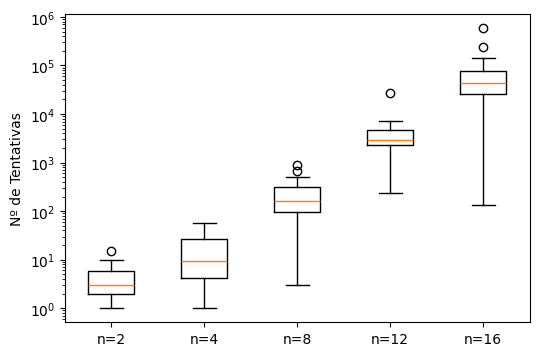

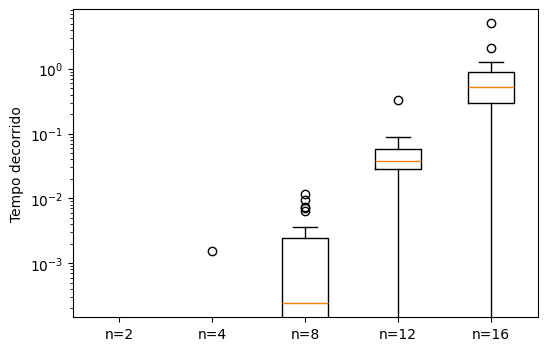

In [41]:
n_bits = [2, 4, 8, 12, 16]
attempts = {n: [] for n in n_bits}
elapsed = {n: [] for n in n_bits}

for n in n_bits:
    for i in range(30):
        att, el = random_search(gerar_padrao_aleatorio(n))
        attempts[n].append(att)
        elapsed[n].append(el)
        

# Boxplot com whiskers
data = [attempts[n] for n in n_bits]
plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=[f'n={n}' for n in n_bits])
plt.yscale('log')
plt.ylabel('Nº de Tentativas')
plt.show()
        
data = [elapsed[n] for n in n_bits]
plt.figure(figsize=(6,4))
plt.boxplot(data, tick_labels=[f'n={n}' for n in n_bits])
plt.yscale('log')
plt.ylabel('Tempo decorrido')
plt.show()

In [42]:
def fitness(guess, target):
    return sum(1 for g, t in zip(guess, target) if g == t)

In [43]:
def mutar(padrao):
    novo = padrao.copy()
    i = random.randrange(0,len(padrao))
    novo[i] = (novo[i] + 1) % 2
    return novo

print(mutar([0, 1, 0, 1, 1, 0, 0, 1]))

[0, 1, 0, 1, 1, 0, 1, 1]


In [ ]:
def sucessive_mutations(target, max_mutations=1000):
    atual = gerar_padrao_aleatorio(len(target))
    fitness_atual = fitness(atual, target)
    historico = [fitness_atual]

    for _ in range(max_mutations):
        candidato = mutar(atual)
        fitness_candidato = fitness(candidato, target)

        if fitness_candidato > fitness_atual:
            atual = candidato
            fitness_atual = fitness_candidato

        historico.append(fitness_atual)

        if fitness_atual == len(target):
            break  # atingiu o padrão correto

    return atual, fitness_atual, historico


Solução final: [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1]
Fitness final: 50


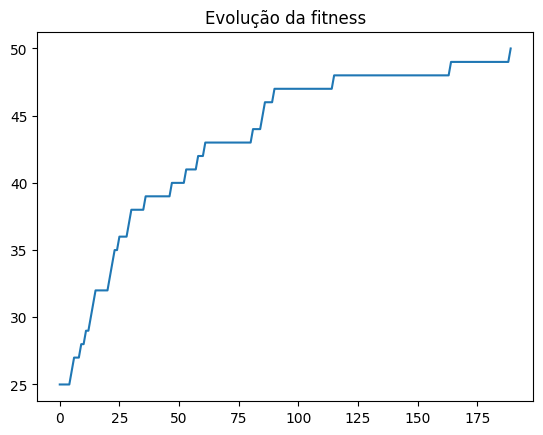

In [68]:
target = gerar_padrao_aleatorio(50)
resultado, fit, hist = sucessive_mutations(target)
print("Solução final:", resultado)
print("Fitness final:", fit)
plt.plot(hist)
plt.title("Evolução da fitness")
plt.show()

Observação: Com a introdução da função de fitness e da mutação orientada, o tempo de execução reduziu-se drasticamente face à procura aleatória. Enquanto a primeira abordagem dependia apenas da sorte, esta nova solução utiliza informação sobre a qualidade(fitness) das tentativas permitindo convergir para a soluçao, alcançando o padrão correto de forma muito mais rápida e eficiente.
Variando o tamanho do target analisamos que deixamos de conseguir chegar à soluçao quando o tamanho ronda os 1000 bits, isso resolveria-se retirando a restriçao do numero maximo de 1000 mutações.

In [83]:
def gerar_populacao(n_individuos, n_bits):
    return [gerar_padrao_aleatorio(n_bits) for _ in range(n_individuos)]




def melhorarPopulacao(target, tamanho_pop=100, frac_melhores=0.3, max_geracoes=1000, limite_estagnacao=100):
    n_bits = len(target)

    # Criar população inicial
    populacao =gerar_populacao(tamanho_pop, n_bits)


    melhor_fitness = 0
    sem_melhora = 0
    historico = []
    inicio = time.time()

    for geracao in range(max_geracoes):

        # Avaliar fitness de cada indivíduo
        fitnesses = []
        for ind in populacao:
            fitnesses.append(fitness(ind, target))

        # Juntar indivíduos e fitness numa lista
        pares = list(zip(populacao, fitnesses))

        # Ordenar manualmente por fitness (maior primeiro)
        pares.sort(reverse=True, key=lambda x: x[1])

        # Selecionar os melhores (30%)
        n_melhores = int(tamanho_pop * frac_melhores)
        melhores = [pares[i][0] for i in range(n_melhores)]
        melhor_atual = pares[0][1]

        historico.append(melhor_atual)

        if melhor_atual > melhor_fitness: #para evitar a estagnacao
            melhor_fitness = melhor_atual
            sem_melhora = 0
        else:

            sem_melhora += 1

        # Condições de paragem
        if melhor_fitness == n_bits or sem_melhora >= limite_estagnacao:
            print(str(sem_melhora))
            break

        # Criar nova população: 30% melhores + 70% mutados
        nova_pop = melhores[:]
        while len(nova_pop) < tamanho_pop:
            x = random.choice(melhores)
            filho = mutar(x)
            nova_pop.append(filho)

        populacao = nova_pop

    fim = time.time()
    tempo_total = fim - inicio
    return melhor_fitness, tempo_total, historico


Melhor fitness encontrado: 998
Tempo de execução: 8.842761278152466 segundos


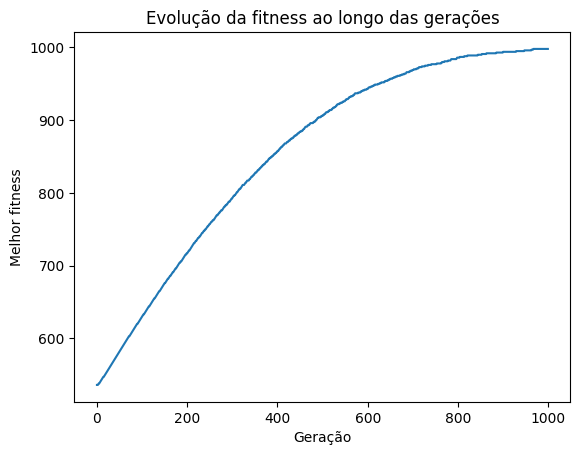

In [84]:
target = gerar_padrao_aleatorio(1000)

melhor, tempo, hist = melhorarPopulacao(target)

print("Melhor fitness encontrado:", melhor)
print("Tempo de execução:", tempo, "segundos")

plt.plot(hist)
plt.xlabel("Geração")
plt.ylabel("Melhor fitness")
plt.title("Evolução da fitness ao longo das gerações")
plt.show()


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


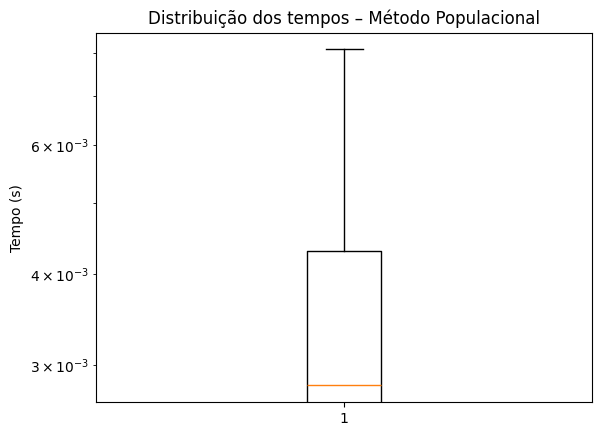

In [85]:
resultados = []
for _ in range(30):
    target = gerar_padrao_aleatorio(16)
    melhor, tempo, _ = melhorarPopulacao(target)
    resultados.append(tempo)

plt.boxplot(resultados)
plt.ylabel("Tempo (s)")
plt.title("Distribuição dos tempos – Método Populacional")
plt.yscale('log')
plt.show()